Data Set:  Country-data.csv
Total SSE for iteration 0 is: 55.11197080818001
Total SSE for iteration 1 is: 47.0733615451358
Total SSE for iteration 2 is: 41.861334018235965
Total SSE for iteration 3 is: 41.20432957603109
Total SSE for iteration 4 is: 40.900246929670836

k-means clustering complete!!!

Final total SSE is: 40.900246929670836
Final SSE for cluster 0 is: 13.131876151948996
Final SSE for cluster 1 is: 12.25586659167667
Final SSE for cluster 2 is: 15.512504186045165

Number of iterations: 5

The final centroids are: 
Centroid 0: [0.011183752955904853, 0.29177115813832827, 0.4417295569564059, 0.2957595516265726, 0.36332095684460414, 0.062332501617225776, 0.9496196111580726, 0.09324019828751694, 0.4093400037906524]
Centroid 1: [0.4415033233140003, 0.1459704234459954, 0.28144675331694, 0.24855348138724107, 0.023376324234278097, 0.15069832009418085, 0.5383329045536405, 0.6214853929502128, 0.01398231388557933]
Centroid 2: [0.09652181789361654, 0.20147695610386734, 0.27380866347724

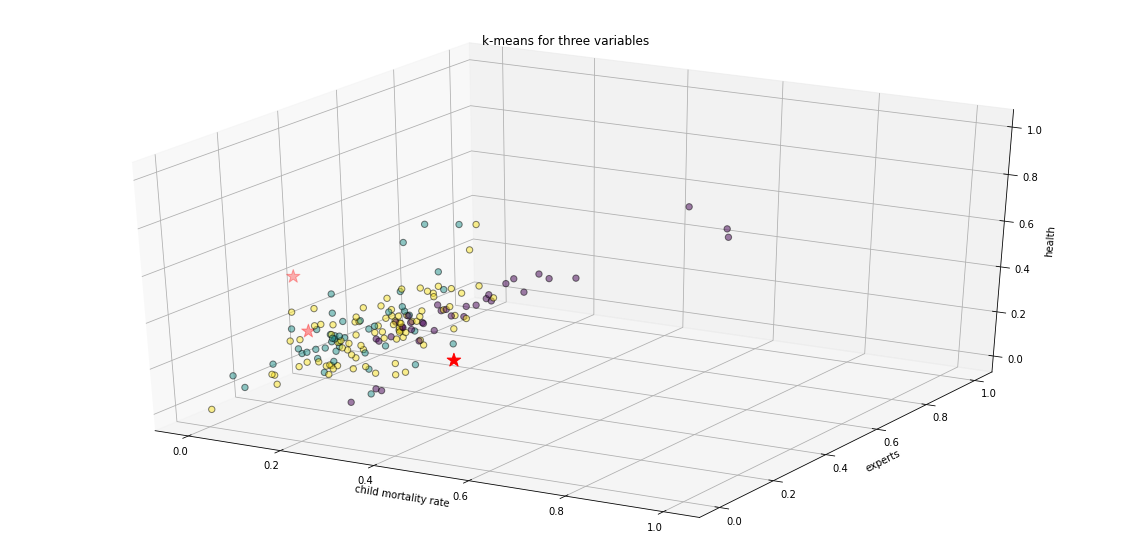

In [ ]:
# flags
WITH_HEADER = 1
SCALE_DATA = 1
DIST_METRIC = "E"
NON_NUMERIC_FEATURES = [0] # input the feature number into the list if the feature is non-numeric

import csv
import math
import random
# convert all data to numeric if possible
def string_to_float_or_int(data_set):
    for i in range(len(data_set)):
        for j in range(len(data_set[i])): 
            if type(data_set[i][j]) != float or type(data_set[i][j]) != int:
                data_set[i][j] = float(data_set[i][j])
    return data_set

# data cleansing 
def clean_non_numeric(data_set,feature_number):
    for observation in data_set:
        del observation[feature_number]
    return data_set

# data normalization
def normalize(data_set):
    for i in range(len(data_set[0])):
        feature_max = data_set[0][i]
        feature_min = data_set[0][i]
        for observation in data_set:
            if observation[i] > feature_max:
                feature_max = observation[i]
            if observation[i] < feature_min:
                feature_min = observation[i]
        for j in range(len(data_set)):
            data_set[j][i] = (data_set[j][i] - feature_min) / (feature_max - feature_min)
    return data_set

# Euclidean distance definition
def euclidean_dist(v1, v2):
    dist = 0
    for i in range(len(v2)):
        dist += (v1[i] - v2[i])**2
    dist = math.sqrt(dist)
    return dist

# Manhattan distance definition
def manhattan(v1, v2):
    dist = 0
    for i in range(len(v2)):
        dist += abs(v1[i] - v2[i])
    return dist

# Assign random centroids
def rand_centroid(data_set, k):
    m = len(data_set)
    n = len(data_set[0])
    centroids = []
    random.seed(7)
    for i in range(k):
        index = int(random.randrange(0,m))
        centroids.append(data_set[index])
    return centroids

# main function for k-means algorithm
def kmeans(data_set, k):
    m = len(data_set)
    cluster_assignment = [[-1.0,-1.0]] * m
    cluster_change = True
    # initialize centroids
    centroids = rand_centroid(data_set, k)
    iteration = 0
    while cluster_change:
        cluster_change = False
        # iterate through all observations
        for i in range(m):
            # iterate through all centroids
            min_dist = 1.7976931348623157e+308
            min_index = -1
            for j in range(k):
                if DIST_METRIC == "E": # Euclidean distance
                    distance = euclidean_dist(centroids[j], data_set[i])
                elif DIST_METRIC == "M": # Manhattan distance
                    distance = manhattan(centroids[j], data_set[i])
                if distance < min_dist:
                    min_dist = distance
                    min_index = j
            # update the cluster which each observation belong to 
            if cluster_assignment[i][0] != min_index:
                cluster_change = True
                cluster_assignment[i] = min_index,min_dist
        # update the centroids
        for i in range(k):
            points_in_cluster = [] # array of indices that belong to cluster i
            for j in range(len(cluster_assignment)):
                if cluster_assignment[j][0] == i:
                    points_in_cluster.append(j)
            temp_sum = [0.0] * len(data_set[0])
            for index in points_in_cluster:
                for j in range(len(data_set[index])):
                    temp_sum[j] += data_set[index][j]
            for j in range(len(temp_sum)):
                temp_sum[j] = float(temp_sum[j]) / len(points_in_cluster)
            centroids[i] = temp_sum   
        # check total SSE
        total_sse = 0
        for observation in cluster_assignment:
            total_sse += observation[1]**2
        if cluster_change:
            print("Total SSE for iteration {} is: {}".format(iteration, total_sse))
            iteration += 1
        else:
            print("\nk-means clustering complete!!!")
            print("\nFinal total SSE is: {}".format(total_sse))
    # check sse for each clusters
    for i in range(k):
        sse = 0
        for observation in cluster_assignment:
            if observation[0] == i:
                sse += observation[1]**2
        print("Final SSE for cluster {} is: {}".format(i, sse))
    # count the number of observations in each cluster
    cluster_count = [0] * k
    for observation in cluster_assignment:
        for i in range(k):
            if observation[0] == i:
                cluster_count[i] += 1
    # return number of iterations used, final centroids, final cluster assignment for each observation, number of observations in each cluster
    print("\nNumber of iterations: {}".format(iteration))
    print("\nThe final centroids are: ")
    for i in range(k):
        print("Centroid {}: {}".format(i, centroids[i]))
    print("\nThe number of elements in each cluster: ")
    for i in range(k):
        print("Cluster {}: {}".format(i, cluster_count[i]))
    print("\nCluster Assignment:\n{}".format(cluster_assignment))
    
    res = [cluster_assignment, centroids]
    
    return res
 
    
# Driver Function
# read data
data_name = 'Country-data.csv'
print("Data Set: ", data_name)
file = open(data_name, 'r')
my_reader = csv.reader(file)
data = []
for row in my_reader:
    data.append(row)

# delete header if flag = 1
if WITH_HEADER == 1:
    del data[0]

# clean non-numeric data
for feature_num in NON_NUMERIC_FEATURES:
    clean_non_numeric(data, feature_num)

# convert every string element in the data_set to float if possible
string_to_float_or_int(data)

# convert all string values in the data set to float
for i in range(len(data)):
    for j in range(len(data[0])):
        data[i][j] = float(data[i][j])

# normalize dataset if needed
if SCALE_DATA == 1:
    data = normalize(data)
    
# PERFORM K-MEANS!!!
res = kmeans(data,3)
cluster_assignment = res[0]
centroids = res[1]

# create clustering 3D plotting of three selected attributes
# here I selected the first 3 attributes: child_mort, experts, health (country excluded since non-numeric)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# create a len(data) * 4 empty matrix
three_attribute_list = [0] * len(data)
for x in range (len(data)):
    three_attribute_list[x] = [0.0] * 4

# insert the relevent data of the three attributes together with the cluster assignment of the observation
for i in range(len(three_attribute_list)):
    for j in range(len(three_attribute_list[0])):
        if j == 3:
            three_attribute_list[i][j] = float(cluster_assignment[i][0])
            break
        three_attribute_list[i][j] = data[i][j+1]        

# plot the clusters
df = pd.DataFrame(three_attribute_list, columns=['child_mort', 'experts','health',"cluster_assignment"])
x = np.array(df['child_mort'])
y = np.array(df['experts'])
z = np.array(df['health'])
cluster_assignment_arr = np.array(df['cluster_assignment'])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, 
            c =  cluster_assignment_arr, cmap = 'viridis',
            edgecolor = 'k', s = 40, alpha = 0.5)

ax.set_title("k-means for three variables")
ax.set_xlabel("child mortality rate")
ax.set_ylabel("experts")
ax.set_zlabel("health")
ax.dist = 10

centroid_column_0 = [row[0] for row in centroids]
centroid_column_1 = [row[1] for row in centroids]
centroid_column_2 = [row[2] for row in centroids]
ax.scatter(centroid_column_0, centroid_column_1, 
           centroid_column_2, 
           s = 200, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()


    

# 新段落